In [1]:
from RegressionModel import LinearRegression1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

In [3]:
bostonH = pd.read_csv("BostonHousing.csv")
bostonH

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
bostonH.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
bostonH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
bostonH.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
X = bostonH.drop(['medv'], axis=1)
y = bostonH['medv']

In [35]:
features = X.columns.tolist()
features

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat']

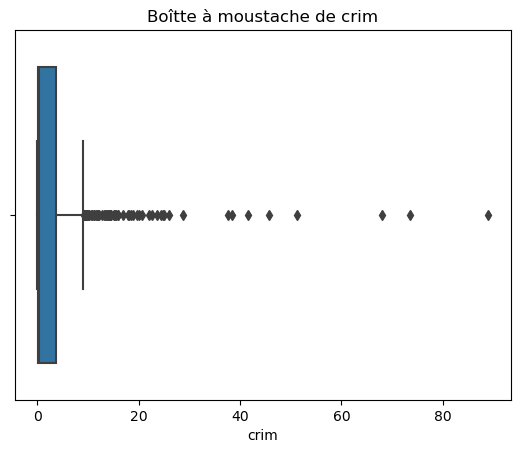

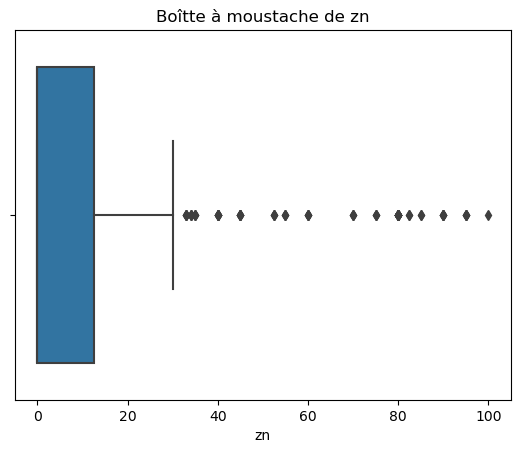

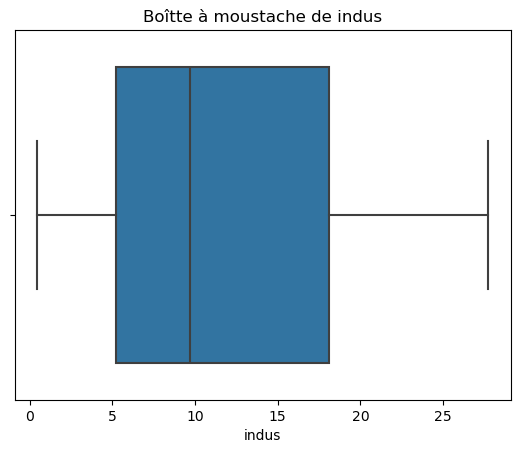

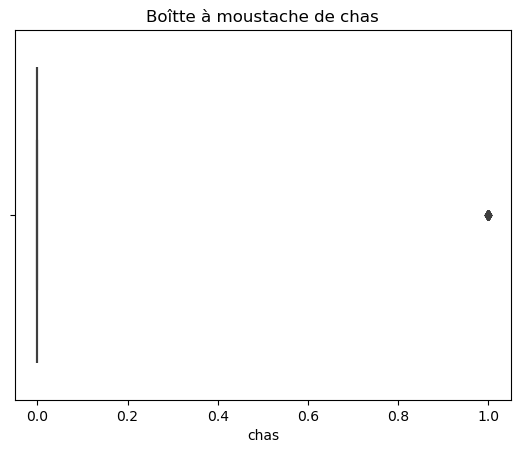

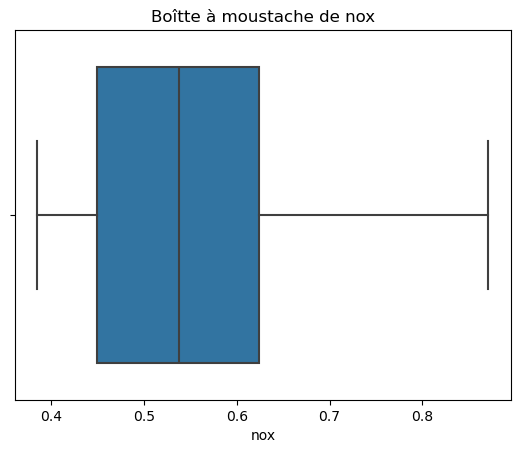

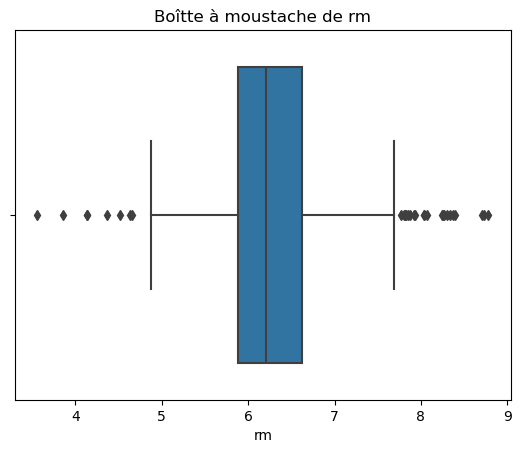

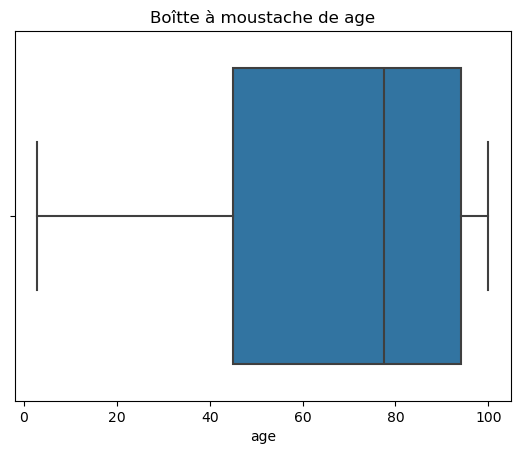

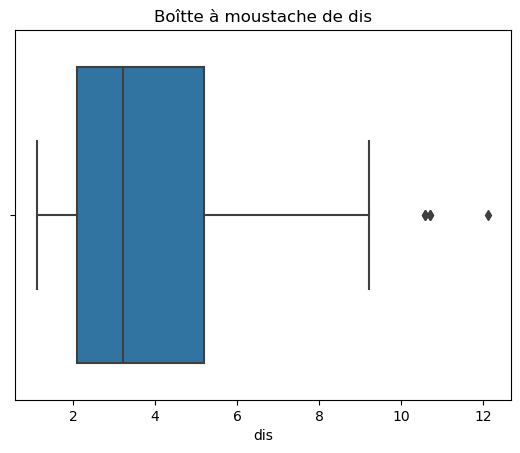

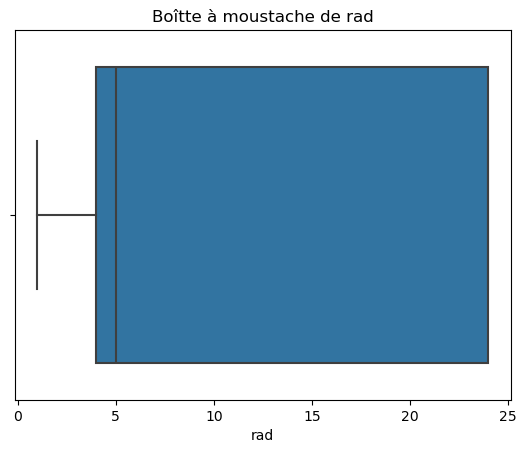

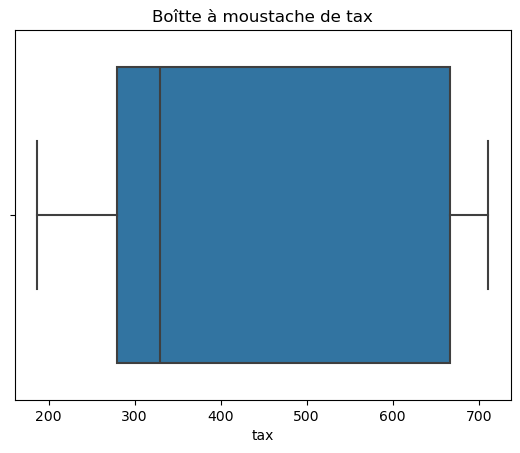

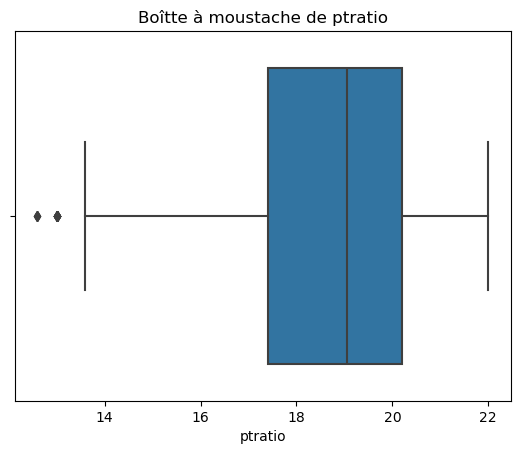

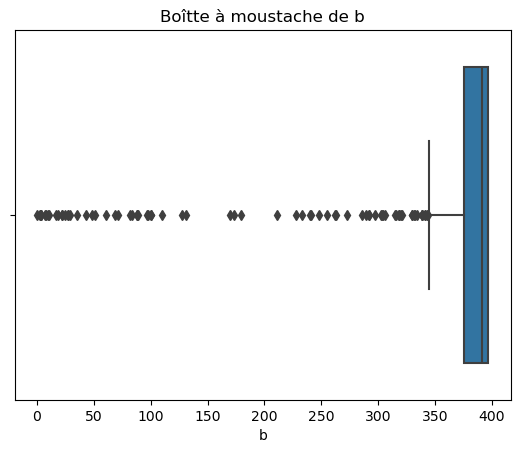

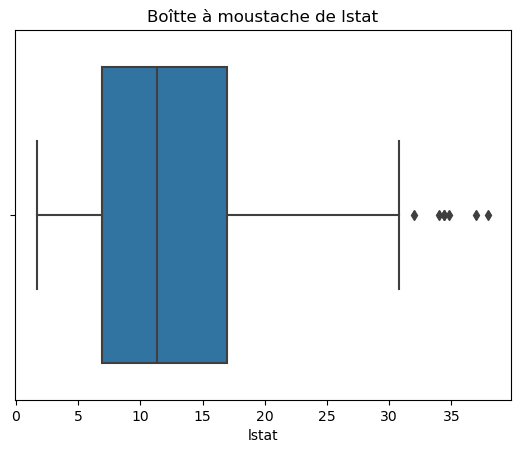

In [9]:
for feature in features:
    sns.boxplot(X, x=feature)
    plt.title(f"Boîtte à moustache de {feature}")
    plt.show()

/home/morel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='medv', ylabel='Count'>

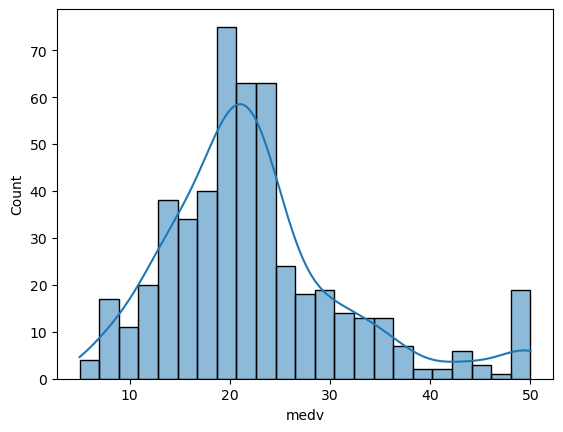

In [11]:
sns.histplot(y, kde=True)

<Axes: xlabel='chas', ylabel='count'>

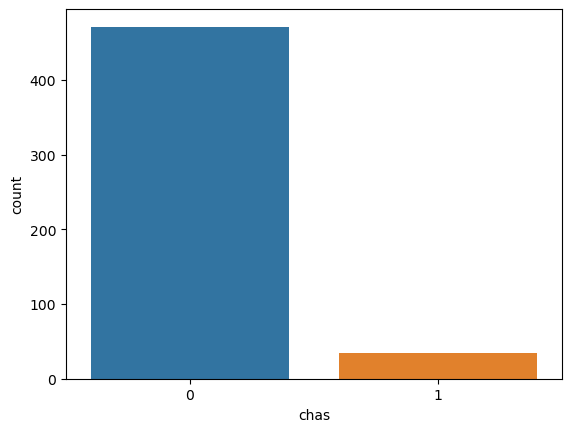

In [13]:
sns.countplot(X, x='chas')

<Axes: xlabel='medv'>

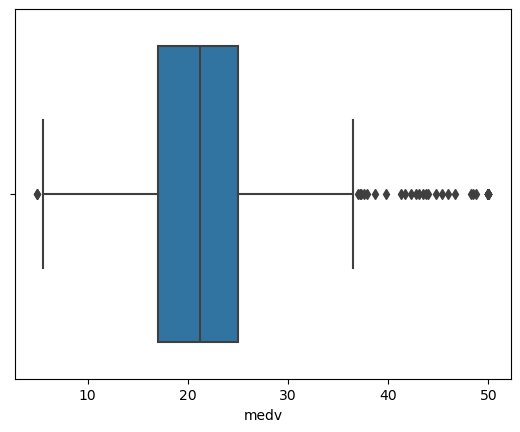

In [15]:
sns.boxplot(bostonH, x = 'medv')

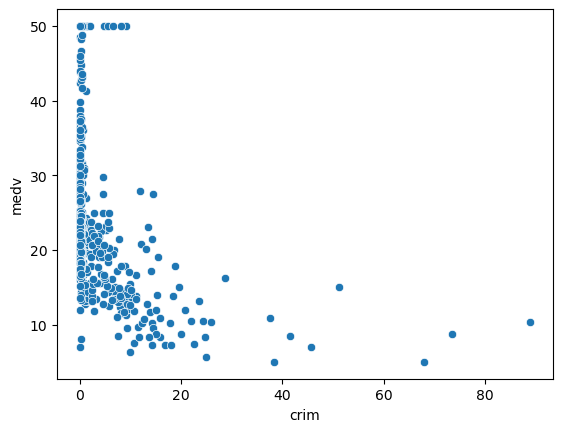

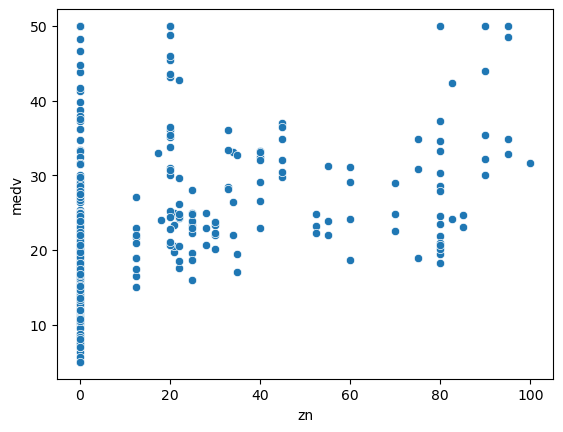

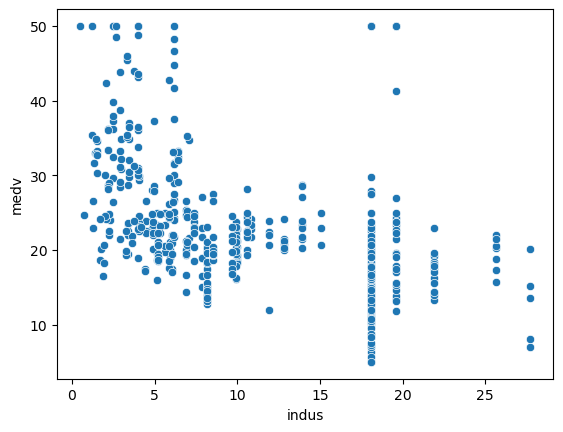

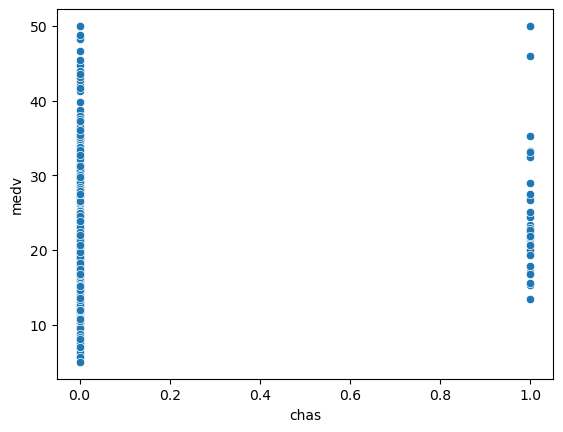

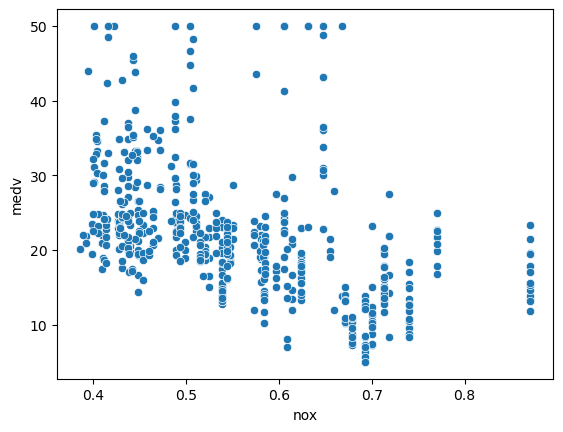

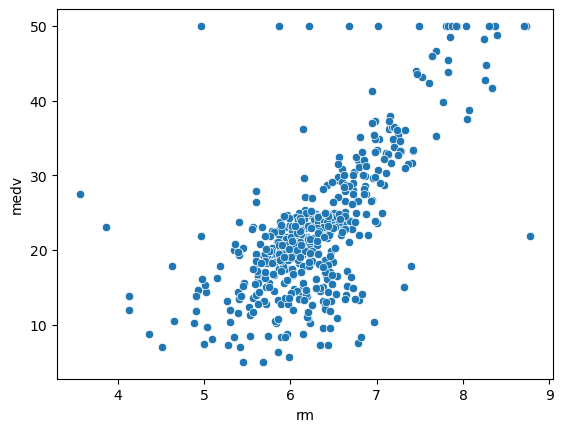

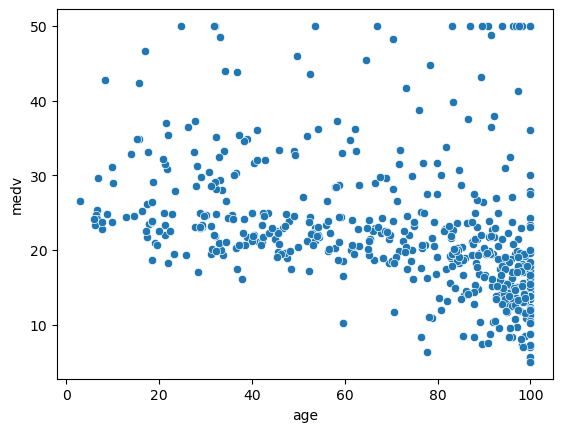

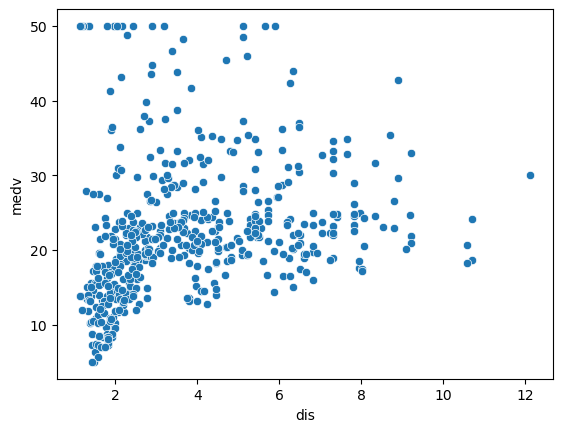

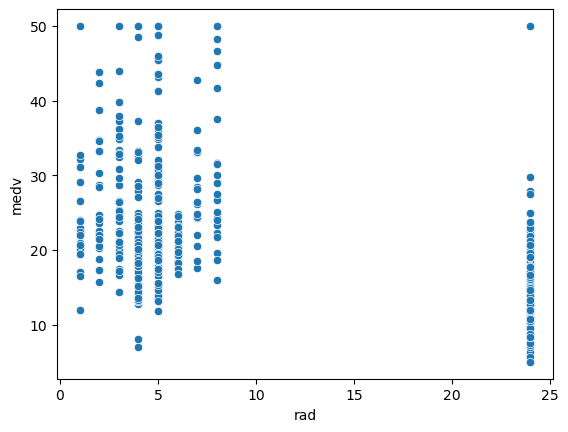

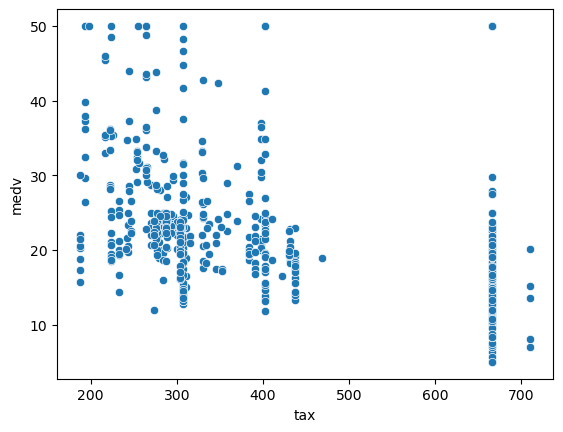

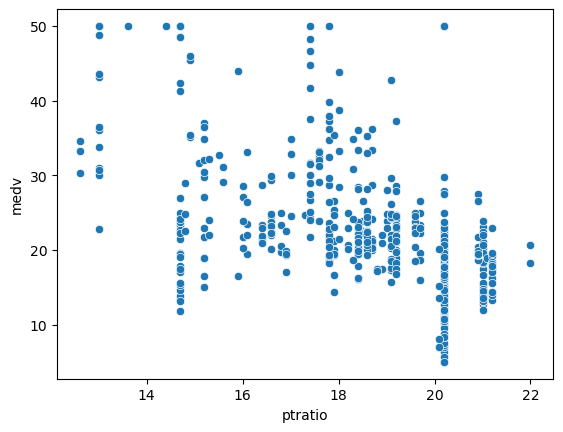

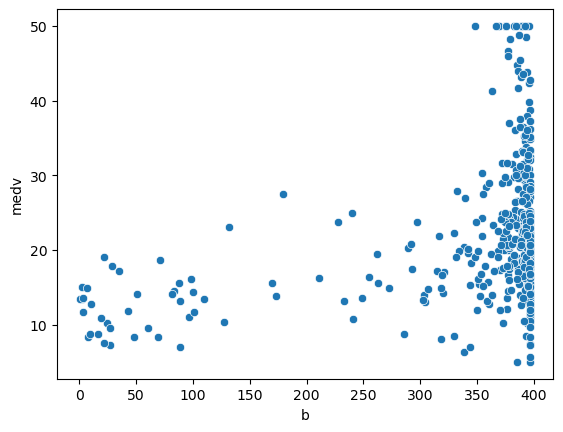

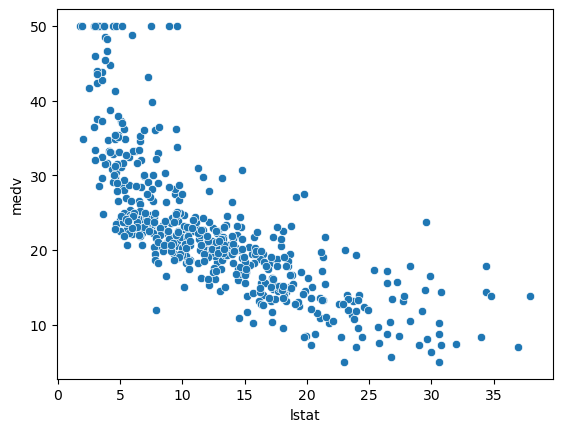

In [17]:
for feature in features:
    sns.scatterplot(bostonH, x=feature, y='medv')
    plt.show()

## Premier model

In [87]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y.values.reshape(-1,1))
# X_scaled.shape

(506, 13)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [89]:
regressor = LinearRegression1(n_iterations=100000, rate=0.0005)

In [91]:
regressor.fit(X_train, y_train)

In [93]:
predictions  = regressor.predict(X_train)
#predictions

In [95]:
regressor.score(X_train, y_train)

0.7471361234716741

In [97]:
regressor.score(X_test,y_test)

0.6878705185718557

99999


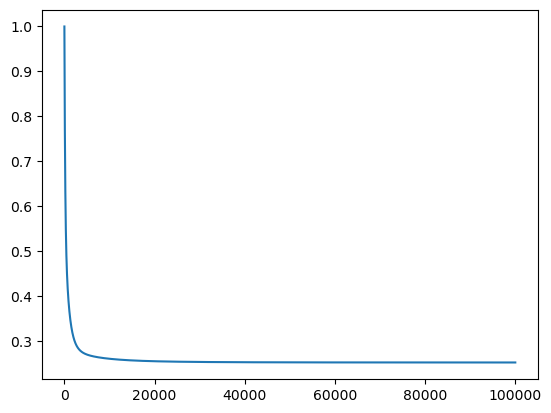

In [99]:
plt.plot(range(1, regressor.n_iterations+1), regressor.costs)
print(regressor.costs.argmin())

In [101]:
from sklearn.linear_model import LinearRegression

In [103]:
regressor2 = LinearRegression()

In [107]:
regressor2.fit(X_train, y_train)

LinearRegression()

In [113]:
regressor2.score(X_train, y_train)

0.7471456321787635

In [111]:
regressor2.score(X_test, y_test)

0.688201180414032

In [115]:
import pickle

In [119]:
with open("house_price_predictor.pkl", 'wb') as file:
    pickle.dump(regressor, file)